# Telco Churn Classification Project

## Overview

### Goal
This python code analyzes data of a fictional telco company that provided home phone and internet services to 7043 customers in California in Q3. The goal is build a classification model that could predict if a customer will churn or not. Below are the questions that the project answers.

* What is the overall count of churn value?
* What is the percentage of male vs. female by churn value?
* What is the churn value count by contract type?
* Is there a relationship between churn value and monthly charges?
* What's the most popular payment method?
* Do more people enroll in device protection?
* What is the percentage of people who go paperless?
* What are the top 5 reasons why customers churn?
* What is the most correlated factor to churn value?

### Data
The initial dataset contains 7042 rows, each representing a customer, and 33 columns.

#### Variables
**Demographics**

CustomerID: A unique ID that identifies each customer.
Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
Gender: The customer’s gender: Male, Female
Age: The customer’s current age, in years, at the time the fiscal quarter ended.
Senior Citizen: Indicates if the customer is 65 or older: Yes, No
Married: Indicates if the customer is married: Yes, No
Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
Number of Dependents: Indicates the number of dependents that live with the customer.

**Location**
CustomerID: A unique ID that identifies each customer.
Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
Country: The country of the customer’s primary residence.
State: The state of the customer’s primary residence.
City: The city of the customer’s primary residence.
Zip Code: The zip code of the customer’s primary residence.
Lat Long: The combined latitude and longitude of the customer’s primary residence.
Latitude: The latitude of the customer’s primary residence.
Longitude: The longitude of the customer’s primary residence.

**Population**
ID: A unique ID that identifies each row.
Zip Code: The zip code of the customer’s primary residence.
Population: A current population estimate for the entire Zip Code area.
 
**Services**
CustomerID: A unique ID that identifies each customer.
Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
Quarter: The fiscal quarter that the data has been derived from (e.g. Q3).
Referred a Friend: Indicates if the customer has ever referred a friend or family member to this company: Yes, No
Number of Referrals: Indicates the number of referrals to date that the customer has made.
Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
Offer: Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.
Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
Avg Monthly Long Distance Charges: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
Avg Monthly GB Download: Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.
Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
Streaming Music: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.
Unlimited Data: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No
Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
Total Refunds: Indicates the customer’s total refunds, calculated to the end of the quarter specified above.
Total Extra Data Charges: Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
Total Long Distance Charges: Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above.

**Status**
CustomerID: A unique ID that identifies each customer.
Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
Quarter: The fiscal quarter that the data has been derived from (e.g. Q3).
Satisfaction Score: A customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).
Satisfaction Score Label: Indicates the text version of the score (1-5) as a text string.
Customer Status: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined
Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
Churn Score Category: A calculation that assigns a Churn Score to one of the following categories: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, and 91-100
CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
CLTV Category: A calculation that assigns a CLTV value to one of the following categories: 2000-2500, 2501-3000, 3001-3500, 3501-4000, 4001-4500, 4501-5000, 5001-5500, 5501-6000, 6001-6500, and 6501-7000.
Churn Category: A high-level category for the customer’s reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. When they leave the company, all customers are asked about their reasons for leaving. Directly related to Churn Reason.
Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

Source: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

## Data Exploration

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC

In [9]:
# Load data
df = pd.read_excel('data/churn.xlsx')

In [10]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [12]:
# Print rows with null values
df[df.isna().any(axis=1)]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [13]:
# Show different churn reasons
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [14]:
# Get proportion of rows with no Churn Reason
null_rows = df[df['Churn Reason'].isna()]
ratio = len(null_rows) / len(df)
print(format(ratio, '.2%'))

73.46%


In [15]:
df['Country'].unique()

array(['United States'], dtype=object)

In [16]:
df['State'].unique()

array(['California'], dtype=object)

In [17]:
df['Zip Code'].value_counts()

Zip Code
90022    5
90024    5
90028    5
90029    5
90032    5
        ..
95991    4
96003    4
96010    4
96020    4
92620    4
Name: count, Length: 1652, dtype: int64

In [18]:
df['City'].value_counts()

City
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Stonyford          4
Washington         4
Big Bar            4
Chester            4
Alta               4
Name: count, Length: 1129, dtype: int64

## Data Cleaning

In [20]:
# Some total charges are not numbers
df['Total Charges'].value_counts()

Total Charges
          11
20.2      11
19.75      9
19.65      8
19.9       8
          ..
1419.4     1
1990.5     1
7362.9     1
346.45     1
820.5      1
Name: count, Length: 6531, dtype: int64

In [21]:
# Display lines where total charges are not numbers
not_numbers_mask = df['Total Charges'].str.contains(r'(\d+(?:\.\d+)?)', regex=True) == False
df[not_numbers_mask]

/var/folders/_f/65hyqq653ws_7lpphp7nvxd80000gn/T/ipykernel_5973/1501556972.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  not_numbers_mask = df['Total Charges'].str.contains(r'(\d+(?:\.\d+)?)', regex=True) == False


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,,No,0,44,2342,NaN


In [22]:
df.loc[not_numbers_mask]['Tenure Months']

2234    0
2438    0
2568    0
2667    0
2856    0
4331    0
4687    0
5104    0
5719    0
6772    0
6840    0
Name: Tenure Months, dtype: int64

In [23]:
df.loc[not_numbers_mask]['Monthly Charges']

2234    52.55
2438    20.25
2568    80.85
2667    25.75
2856    56.05
4331    19.85
4687    25.35
5104    20.00
5719    19.70
6772    73.35
6840    61.90
Name: Monthly Charges, dtype: float64

In [24]:
# Assuming those users are new customers (not a full month), impute the rows with a charge of zero
df.loc[not_numbers_mask, 'Total Charges'] = 0

# Convert to float
df['Total Charges'] = df['Total Charges'].astype('float')

In [25]:
df.loc[not_numbers_mask]['Total Charges']

2234    0.0
2438    0.0
2568    0.0
2667    0.0
2856    0.0
4331    0.0
4687    0.0
5104    0.0
5719    0.0
6772    0.0
6840    0.0
Name: Total Charges, dtype: float64

## Data Analysis and Visualization (EDA)

### What is the overall count of churn value?

In [28]:
# Data
df['Churn Value'].value_counts(normalize=True)

## Unbalanced, about a 3 to 1 ratio

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

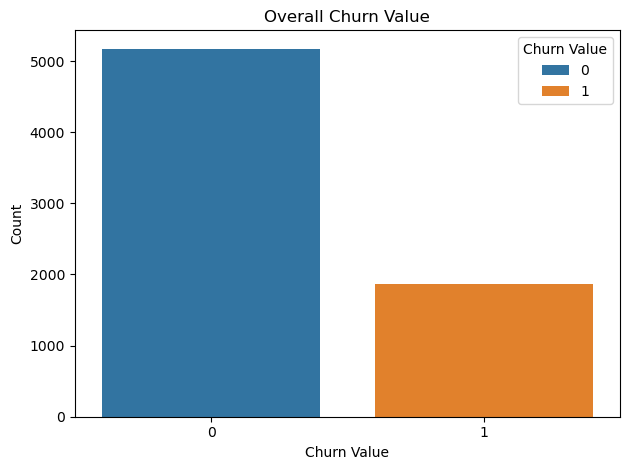

In [29]:
# Visualization
sns.countplot(data=df, x='Churn Value', hue='Churn Value')
plt.title('Overall Churn Value')
plt.xlabel('Churn Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### What is the count of male vs. female by churn value?

In [31]:
# Data
counbygender=df.groupby(['Churn Value','Gender'])['CustomerID'].count().reset_index(name='Count')
counbygender

,Churn Value,Gender,Count
0,0,Female,2549
1,0,Male,2625
2,1,Female,939
3,1,Male,930


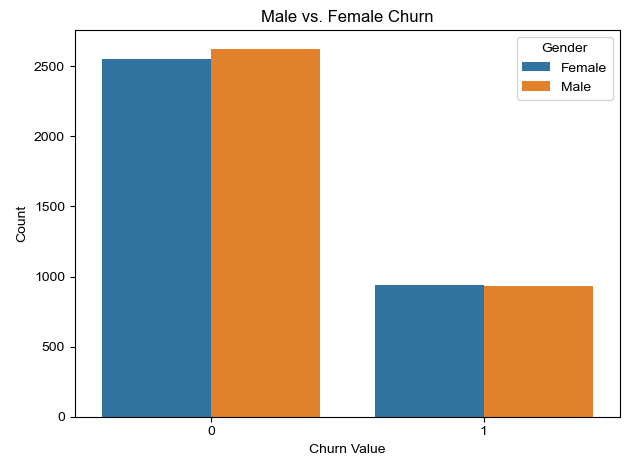

In [32]:
# Visualization
sns.barplot(data=counbygender, x='Churn Value', y='Count', hue='Gender').set(title='Male vs. Female Churn')
plt.xlabel('Churn Value')
plt.ylabel('Count')
plt.tight_layout()
sns.set(rc={"figure.figsize":(12,6)})
plt.show()

### What is the churn value count by contract type?

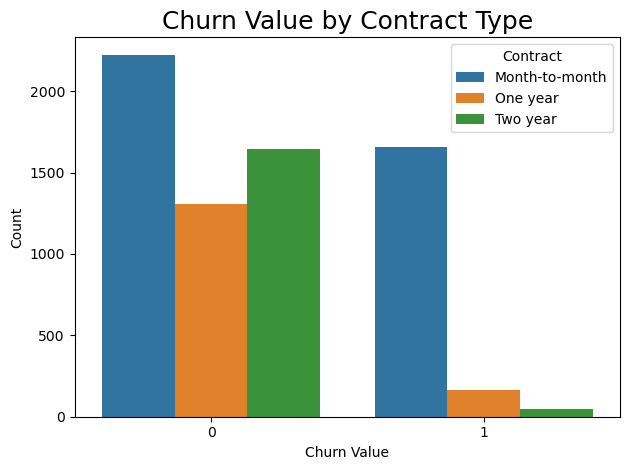

In [34]:
# Countplot contract type
sns.reset_orig()
sns.countplot(data=df, x='Churn Value', hue='Contract')
plt.title('Churn Value by Contract Type', fontsize=18)
plt.xlabel('Churn Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Customers with monthly contracts are most likely to leave

### Is there a relationship between churn value and monthly charges?

In [36]:
# Data
meanbychurn=df.groupby(['Churn Value'])['Monthly Charges'].mean().reset_index(name='Mean')
meanbychurn

,Churn Value,Mean
0,0,61.265124
1,1,74.441332


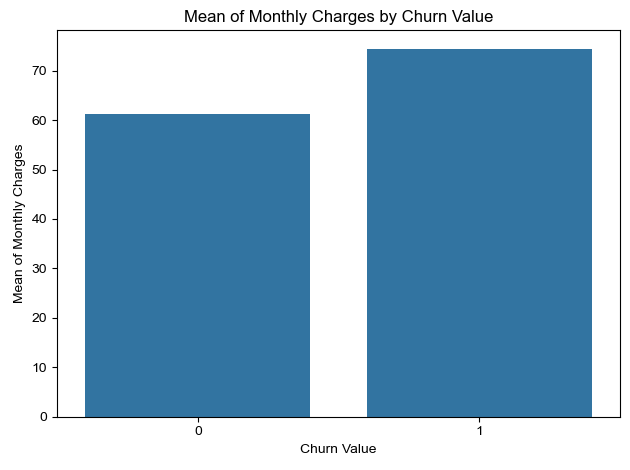

In [37]:
# Visualization
sns.barplot(data=meanbychurn, x='Churn Value', y='Mean').set(title='Mean of Monthly Charges by Churn Value')
plt.xlabel('Churn Value')
plt.ylabel('Mean of Monthly Charges')
plt.tight_layout()
sns.set(rc={"figure.figsize":(12,6)})
plt.show()

### What's the most popular payment method?

In [39]:
# Data
counbymethod=df.groupby(['Payment Method'])['CustomerID'].count().reset_index(name='Count')
counbymethod = counbymethod.sort_values(by=['Count'], ascending=False)
counbymethod

,Payment Method,Count
2,Electronic check,2365
3,Mailed check,1612
0,Bank transfer (automatic),1544
1,Credit card (automatic),1522


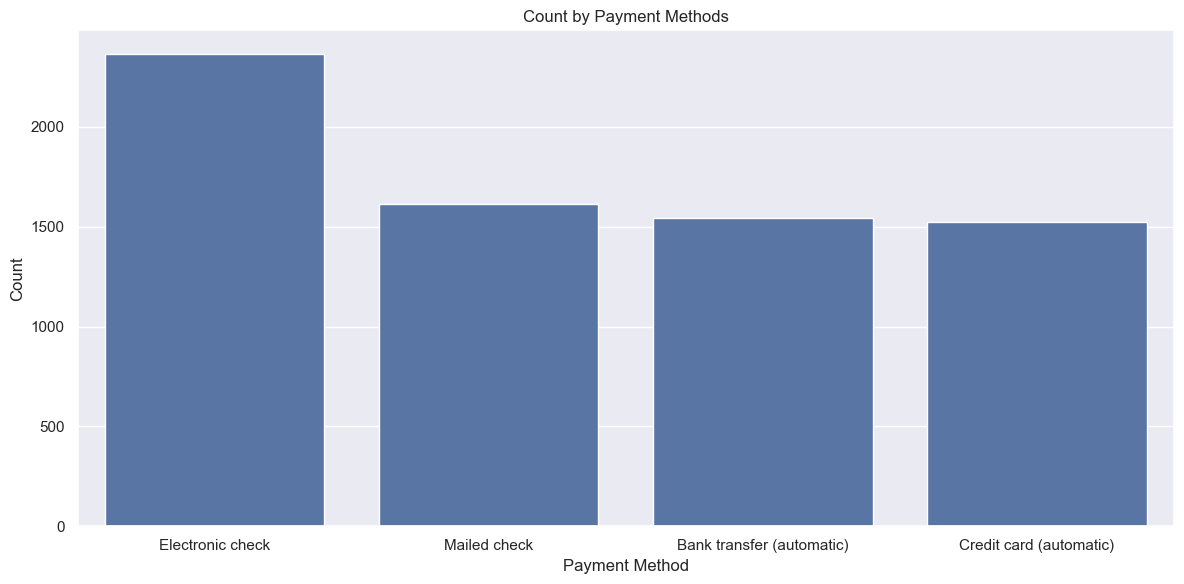

In [40]:
# Visualization
sns.barplot(data=counbymethod, x='Payment Method', y='Count').set(title='Count by Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.tight_layout()
sns.set(rc={"figure.figsize":(12,6)})
plt.show()

### Do more people enroll in device protection?

In [42]:
# Data
countbyprot=df.groupby(['Device Protection'])['CustomerID'].count().reset_index(name='Count')
countbyprot

,Device Protection,Count
0,No,3095
1,No internet service,1526
2,Yes,2422


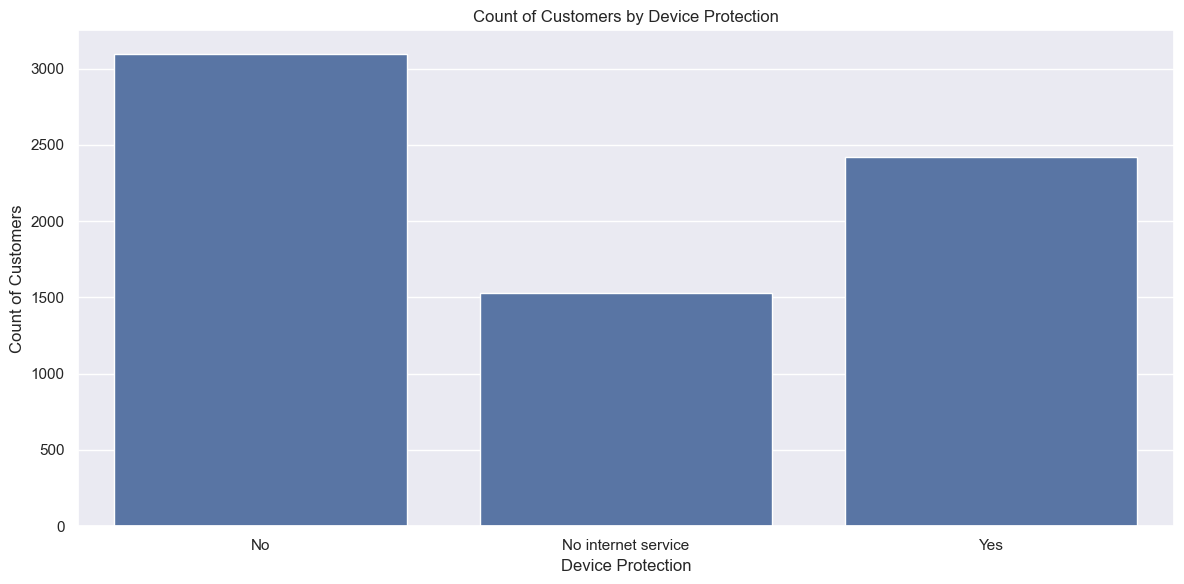

In [43]:
# Visualization
sns.barplot(data=countbyprot, x='Device Protection', y='Count').set(title='Count of Customers by Device Protection')
plt.xlabel('Device Protection')
plt.ylabel('Count of Customers')
plt.tight_layout()
sns.set(rc={"figure.figsize":(12,6)})
plt.show()

### Do more people go paperless?

In [45]:
# Data
countbypaper=df.groupby(['Paperless Billing'])['CustomerID'].count().reset_index(name='Count')
countbypaper

,Paperless Billing,Count
0,No,2872
1,Yes,4171


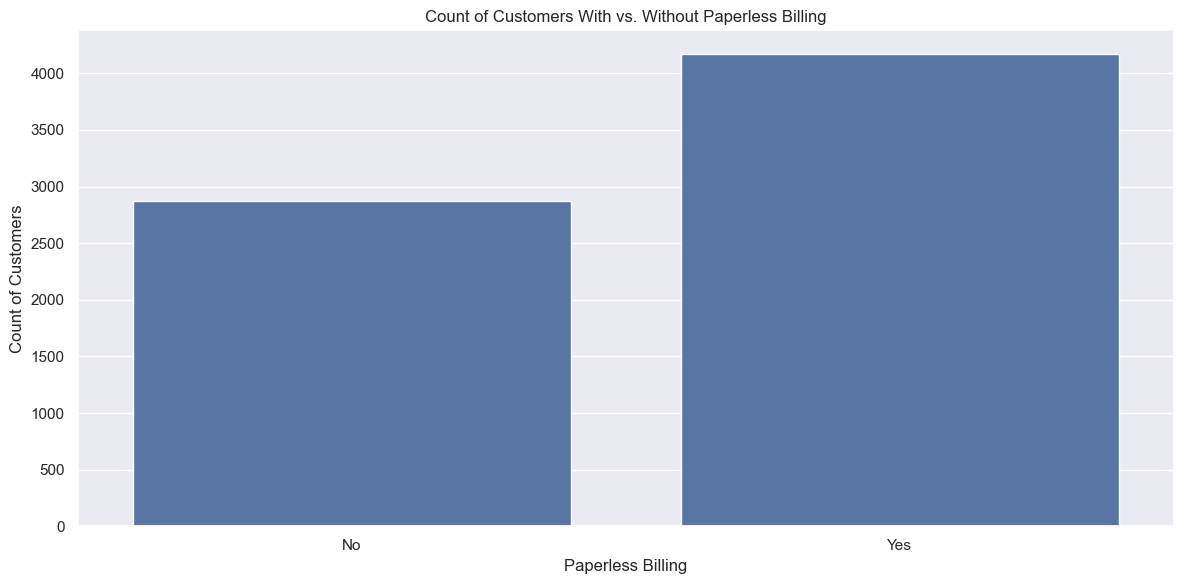

In [46]:
# Visualization
sns.barplot(data=countbypaper, x='Paperless Billing', y='Count').set(title='Count of Customers With vs. Without Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count of Customers')
plt.tight_layout()
sns.set(rc={"figure.figsize":(12,6)})
plt.show()

### What are the top 5 reasons why customers churn?

In [48]:
top_5 = pd.DataFrame(df['Churn Reason'].value_counts().head(5)).reset_index()
top_5['Rank'] = top_5['count'].rank(ascending=False).astype('int')
top_5 = top_5[['Rank', 'Churn Reason']].set_index('Rank')
top_5

## This shows that customer service is an important factor for most people when choosing a telco company

,Churn Reason
Rank,
1,Attitude of support person
2,Competitor offered higher download speeds
3,Competitor offered more data
4,Don't know
5,Competitor made better offer


### What is the most correlated factor to churn value?

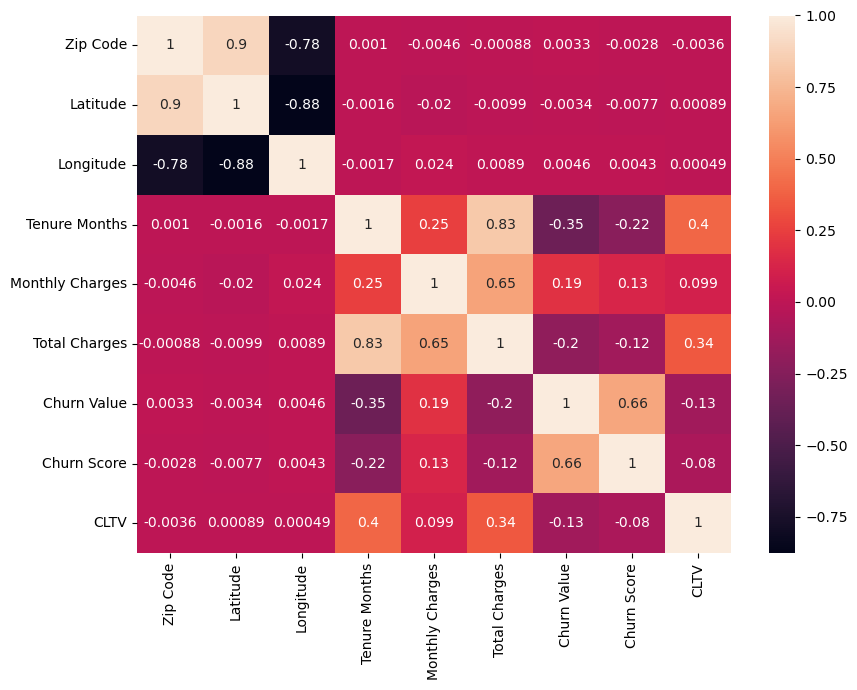

In [50]:
# Heatmap
sns.reset_orig()
plt.rcParams["figure.figsize"] = (9,7)
corr_matrix = df.drop('Count', axis=1).corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.tight_layout()
plt.show()

In [51]:
# Correlations with Churn Value
correlations = corr_matrix.loc['Churn Value'].drop('Churn Value').sort_values()
correlations

Tenure Months     -0.352229
Total Charges     -0.198324
CLTV              -0.127463
Latitude          -0.003384
Zip Code           0.003346
Longitude          0.004594
Monthly Charges    0.193356
Churn Score        0.664897
Name: Churn Value, dtype: float64

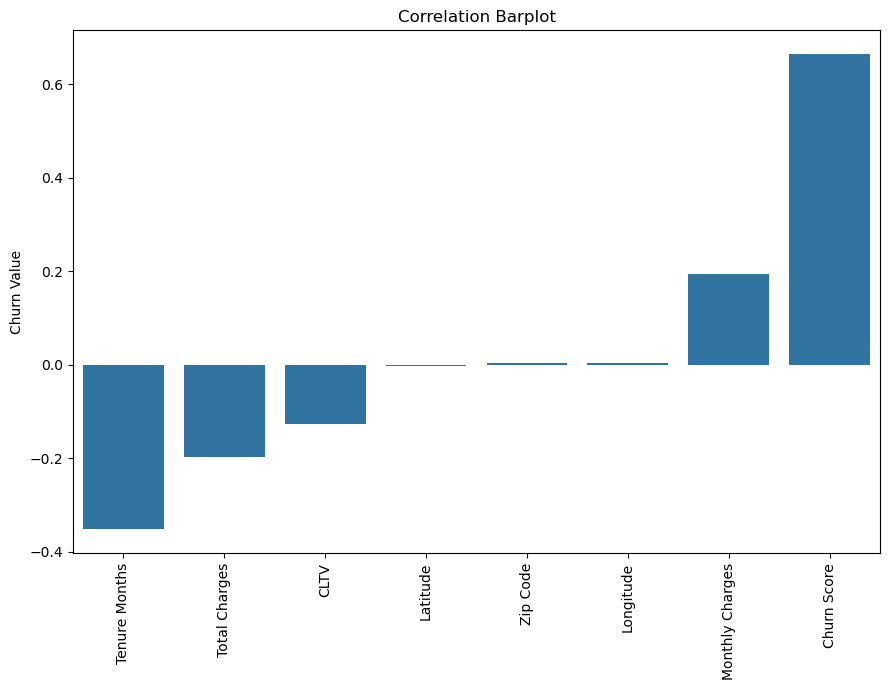

In [52]:
# Correlation barplot
sns.barplot(data=correlations)
plt.tick_params(axis='x', rotation=90)
plt.title('Correlation Barplot')
plt.tight_layout()
plt.show()

## The churn score is the most correlated factor

## Data Preprocessing

**Drop redundant columns**

CustomerID: Not necessary

Count: We can count the rows without it

Country: All USA

State: All California

Zip Code , Lat Long, Latitude, Longitude: One feature for location is enough

Churn Label: We have the churn value

Churn Reason: We can't convert this column in categorical values

In [87]:
df = df.drop(['CustomerID',
              'Count',
              'Country',
              'State',
              'Zip Code',
              'Lat Long',
              'Latitude',
              'Longitude',
              'Churn Label',
              'Churn Reason'], axis=1)

In [88]:
# Use Frequency Encoding for City
freq_map = df['City'].value_counts()
df['City'] = df['City'].map(freq_map)
df['City']

0       305
1       305
2       305
3       305
4       305
       ... 
7038      5
7039      5
7040      5
7041      5
7042     10
Name: City, Length: 7043, dtype: int64

In [89]:
# Get remaining string columns
is_string = (df.map(type) == str).all()
string_columns = list(is_string[is_string].index)
string_columns

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [90]:
# Get columns with more than 2 unique values
nb_unique = df[string_columns].nunique()
more_than_two = nb_unique[nb_unique > 2]
more_than_two

Multiple Lines       3
Internet Service     3
Online Security      3
Online Backup        3
Device Protection    3
Tech Support         3
Streaming TV         3
Streaming Movies     3
Contract             3
Payment Method       4
dtype: int64

In [91]:
# Print the unique values
for column in more_than_two.index:
    print(column + ': ' + ', '.join(df[column].unique()))

Multiple Lines: No, Yes, No phone service
Internet Service: DSL, Fiber optic, No
Online Security: Yes, No, No internet service
Online Backup: Yes, No, No internet service
Device Protection: No, Yes, No internet service
Tech Support: No, Yes, No internet service
Streaming TV: No, Yes, No internet service
Streaming Movies: No, Yes, No internet service
Contract: Month-to-month, Two year, One year
Payment Method: Mailed check, Electronic check, Bank transfer (automatic), Credit card (automatic)


In [92]:
# Regroup data of Multiple Lines
df['Multiple Lines'] = np.where(df['Multiple Lines'] == 'No phone service', 'No', df['Multiple Lines'])
df['Multiple Lines'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
# Regroup data of Online Security
df['Online Security'] = np.where(df['Online Security'] == 'No internet service', 'No', df['Online Security'])
df['Online Security'].unique()

array(['Yes', 'No'], dtype=object)

In [94]:
# Regroup data of Online Backup
df['Online Backup'] = np.where(df['Online Backup'] == 'No internet service', 'No', df['Online Backup'])
df['Online Backup'].unique()

array(['Yes', 'No'], dtype=object)

In [95]:
# Regroup data of Device Protection
df['Device Protection'] = np.where(df['Device Protection'] == 'No internet service', 'No', df['Device Protection'])
df['Device Protection'].unique()

array(['No', 'Yes'], dtype=object)

In [96]:
# Regroup data of Tech Support
df['Tech Support'] = np.where(df['Tech Support'] == 'No internet service', 'No', df['Tech Support'])
df['Tech Support'].unique()

array(['No', 'Yes'], dtype=object)

In [97]:
# Regroup data of Streaming TV
df['Streaming TV'] = np.where(df['Streaming TV'] == 'No internet service', 'No', df['Streaming TV'])
df['Streaming TV'].unique()

array(['No', 'Yes'], dtype=object)

In [98]:
# Regroup data of Streaming Movies
df['Streaming Movies'] = np.where(df['Streaming Movies'] == 'No internet service', 'No', df['Streaming Movies'])
df['Streaming Movies'].unique()

array(['No', 'Yes'], dtype=object)

In [99]:
# Double check all string columns have no more than 2 unique values
# Except for Internet Service, Contract and Payment Method
nb_unique = df[string_columns].nunique()
more_than_two = nb_unique[nb_unique > 2]
more_than_two

Internet Service    3
Contract            3
Payment Method      4
dtype: int64

In [100]:
# Une One Hot Encoding for non-numeric columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(df[string_columns])
new_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(string_columns))
df = df.drop(columns=string_columns, axis=1).join(new_df)

In [101]:
# Assert all columns are numeric
len(df.columns) == len(df.select_dtypes([np.number]).columns)

True

In [102]:
df.head()

,City,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,...,Device Protection_Yes,Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,305,2,53.85,108.15,1,86,3239,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,305,2,70.70,151.65,1,67,2701,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,305,8,99.65,820.50,1,86,5372,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,305,28,104.80,3046.05,1,84,5003,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,305,49,103.70,5036.30,1,89,5340,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    7043 non-null   int64  
 1   Tenure Months                           7043 non-null   int64  
 2   Monthly Charges                         7043 non-null   float64
 3   Total Charges                           7043 non-null   float64
 4   Churn Value                             7043 non-null   int64  
 5   Churn Score                             7043 non-null   int64  
 6   CLTV                                    7043 non-null   int64  
 7   Gender_Male                             7043 non-null   float64
 8   Senior Citizen_Yes                      7043 non-null   float64
 9   Partner_Yes                             7043 non-null   float64
 10  Dependents_Yes                          7043 non-null   floa

## Data Modeling

In [105]:
# Separate the features and the target variable
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

In [106]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [107]:
# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression

In [109]:
# Create model and fit
log_model=LogisticRegression() 
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [110]:
# Accuracy score
predict=log_model.predict(scaled_X_test)
accuracy_score(y_test, predict)

0.8950354609929078

In [111]:
# Confusion matrix
log_cm = confusion_matrix(y_test, predict)
log_cm

array([[478,  35],
       [ 39, 153]])

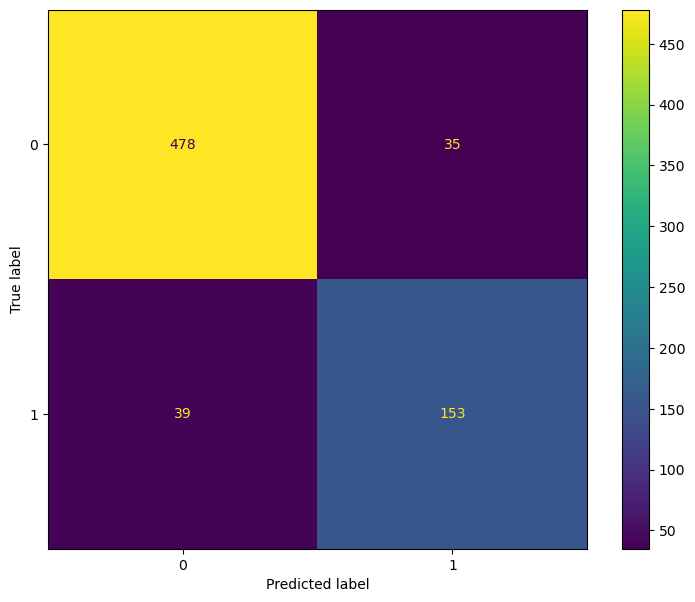

In [112]:
plt.rcParams['axes.grid'] = False
log_disp=ConfusionMatrixDisplay(log_cm, display_labels=log_model.classes_)
log_disp.plot()
plt.show()

In [113]:
log_report = classification_report(y_test, predict)
print(log_report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       513
           1       0.81      0.80      0.81       192

    accuracy                           0.90       705
   macro avg       0.87      0.86      0.87       705
weighted avg       0.89      0.90      0.89       705



### K-Nearest Neighbors

In [115]:
# Initialize classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit model
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [116]:
# Grid search
# Set-up pipeline object
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', KNeighborsClassifier())
])

In [117]:
# Use GridSearchCV to find optimal params
param_grid = {'classifier__n_neighbors': list(range(1,20)),
              'classifier__weights': ['uniform', 'distance'],
              'classifier__p': np.linspace(1,2,5)}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19],
                         'classifier__p': array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [118]:
# View best params
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier',
   KNeighborsClassifier(n_neighbors=19, p=1.5, weights='distance'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': KNeighborsClassifier(n_neighbors=19, p=1.5, weights='distance'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 19,
 'classifier__p': 1.5,
 'classifier__weights': 'distance'}

In [119]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [120]:
pipe.set_params(classifier__n_neighbors=19)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=19))])

In [121]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=19))])

In [122]:
pipe_pred = pipe.predict(X_test)

In [123]:
# Accuracy score
accuracy_score(y_test, pipe_pred)

0.8468085106382979

In [124]:
# Classification report
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       513
           1       0.72      0.72      0.72       192

    accuracy                           0.85       705
   macro avg       0.81      0.81      0.81       705
weighted avg       0.85      0.85      0.85       705



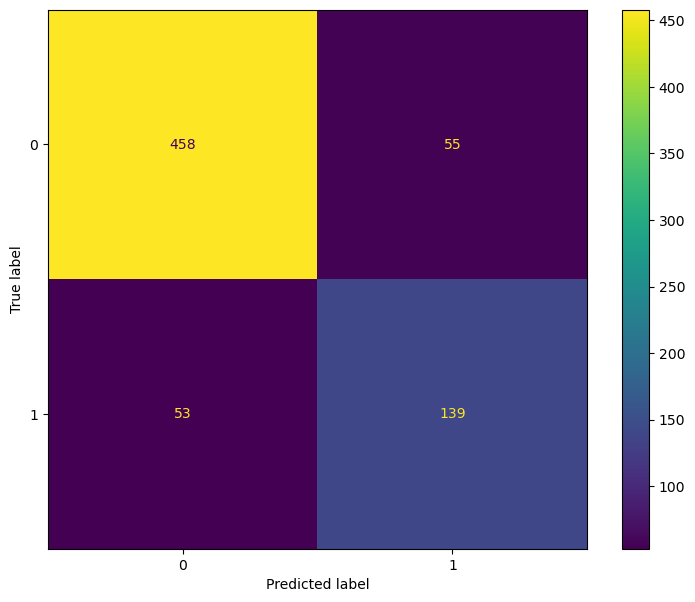

In [125]:
# Confusion matrix
cm = confusion_matrix(y_test,pipe_pred)
knn_disp=ConfusionMatrixDisplay(cm, display_labels=pipe.classes_)
knn_disp.plot()
plt.show()

### Support Vector Machines (SVM)

In [127]:
# Instanciate SVM model with class weights
class_weight = {0:3, 1:1}
svm = SVC(class_weight=class_weight)

In [128]:
# Use grid search in attempt to find the best performing model
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [1, 2],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm, param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight={0: 3, 1: 1}),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [129]:
# Best accuracy score
grid.best_score_

0.9031235761467388

In [130]:
# Best parameters
grid.best_params_

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [131]:
# Confusion matrix
y_pred = grid.predict(scaled_X_test)

plt.rcParams['axes.grid'] = False
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=grid.classes_)
disp.plot();

In [132]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       513
           1       0.90      0.65      0.76       192

    accuracy                           0.89       705
   macro avg       0.89      0.81      0.84       705
weighted avg       0.89      0.89      0.88       705



### Make Predictions

In [163]:
# Create scaled input matrix
data = {
    'City': [freq_map['San Diego']],                           
    'Tenure Months': [40],           
    'Monthly Charges': [75.0],       
    'Total Charges': [40 * 75],             
    'Churn Score': [66],
    'CLTV': [5500.0],                       
    'Gender_Male': [1],    
    'Senior Citizen_Yes': [0],               
    'Partner_Yes': [1],                        
    'Dependents_Yes': [1],
    'Phone Service_Yes': [1],
    'Multiple Lines_Yes' : [0],
    'Internet Service_Fiber optic': [0],
    'Internet Service_No': [0],                
    'Online Security_Yes' : [1],
    'Online Backup_Yes': [0],
    'Device Protection_Yes': [1],
    'Tech Support_Yes': [0],
    'Streaming TV_Yes': [1],
    'Streaming Movies_Yes': [1],
    'Contract_One year' : [0], 
    'Contract_Two year': [1],
    'Paperless Billing_Yes': [1],
    'Payment Method_Credit card (automatic)': [1],
    'Payment Method_Electronic check': [0],
    'Payment Method_Mailed check': [0]  
}

x = pd.DataFrame(data)
scaled_x = scaler.transform(x)

In [165]:
scaled_x

array([[ 1.80002613,  0.31172704,  0.34535582,  0.31968888,  0.34133042,
         0.92958867,  0.98995265, -0.4394856 ,  1.03076654,  1.8157503 ,
         0.32574254, -0.85207679, -0.88166976, -0.53197364,  1.5865696 ,
        -0.71978041,  1.38203082, -0.63811724,  1.26773718,  1.2530579 ,
        -0.51533977,  1.77194185,  0.82938702,  1.90250717, -0.70643749,
        -0.54830298]])

In [169]:
# Predict with logistic regression
pred = log_model.predict(scaled_x)
print(pred[0])

0


## End